In [1]:
# prepare python
%pylab inline
import numpy as np
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## I. Polynomial Dataset

In [89]:
# simulate population
pop1_X, pop1_Y = make_regression(n_samples=50, noise=10, n_informative=1, n_features=1, random_state=1, bias=0) 
pop2_X, pop2_Y = make_regression(n_samples=50, noise=10, n_informative=1, n_features=1, random_state=1, bias=100) 
pop3_X, pop3_Y = make_regression(n_samples=50, noise=10, n_informative=1, n_features=1, random_state=1, bias=-100)

In [90]:
# combine as matrix 
pop_X = np.concatenate((pop1_X,pop2_X,pop3_X))
pop_Y = np.concatenate((pop1_Y, 2 * pop2_Y, -2 * pop3_Y))
pop_Y = np.vstack(pop_Y)

In [91]:
# 1D polynominal data generater
def poly_generater_1D(X,n=3,flag=1):
    d = len(X)
    X_0 = X.copy()
    
    for i in range(2,n+1):
        X = np.vstack([X,X_0**(i)])
    
    if flag == 1:
        X = np.vstack([X,np.ones(d)])
        
    X = X.T
    return X


In [92]:
# the model now is more complicated

pop_X = poly_generater_1D(pop_X.flatten(),2)
pop_X.shape

(150, 3)

## SGD

In [93]:
## parameters
n_learning_rate = 0.1
# same prediction and cost function as before 
## Specify prediction function
def fx(theta, X):
    return np.dot(X, theta)
 
## specify cost function
def fcost(theta, X, y):
    return (1./2*len(X)) * sum((fx(theta,X) - y)**2)

In [94]:
## specify function to calculate gradient at a given theta - returns a vector of length(theta)
# different from gradient descent method 
# not summing up the gradients 
def gradient(theta, X, y):
    grad_theta = (1./len(X)) * np.multiply((fx(theta, X)) - y, X) 
    return grad_theta

In [95]:
### DO stochastic gradient descent
# starting values for alpha & beta
theta = np.zeros(pop_X.shape[1])
theta

array([0., 0., 0.])

In [96]:
# store starting theta & cost
arraytheta = np.array([theta])
arraycost = np.array([])

In [97]:

# feed data through and update theta; capture cost and theta history
for i in range(0, len(pop_X)):
    
    # calculate cost for theta on CURRENT point
    cost = fcost(theta, pop_X[i], pop_Y[i])
    arraycost = np.append(arraycost, cost)
    
    # update theta with gradient descent
    theta = theta - n_learning_rate * gradient(theta, pop_X[i], pop_Y[i])
    arraytheta = np.vstack([arraytheta, theta])

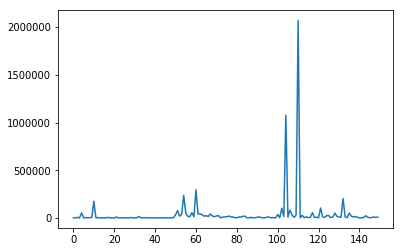

In [98]:
# plot the prediction error 
plt.plot(arraycost)

In [106]:
arraytheta[-1] #the results show that overfitting has happened

array([-121.86258139,   27.01587818,  162.10510175])

In [107]:
arraytheta[49]

array([72.40073518, -2.64956366,  5.47277004])

In [108]:
arraytheta[99]

array([156.72324461,  42.66786083, 142.60727451])

## FOBOS

In [157]:
theta_fobos = np.zeros(pop_X.shape[1])

In [158]:
# store starting theta & cost
arraytheta_fobos = np.array([theta_fobos])
arraycost_fobos = np.array([])

In [159]:
## parameters(current hypterparameters values are specified randomly)
n_learning_rate1 = 0.11
n_learning_rate2 = 0.6
lamda = 1

In [160]:
def L1_fobos(w,theta):
    w_new = np.zeros(len(w))
    m = abs(w)>theta
    
    w_new[m] = w[m] - theta*np.sign(w[m])
    
    return w_new

In [161]:
for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_fobos, pop_X[i], pop_Y[i])
    arraycost_fobos = np.append(arraycost_fobos, cost)
    
    # update theta with gradient descent
    grad = gradient(theta_fobos, pop_X[i], pop_Y[i])
    
    theta_fobos = L1_fobos(theta_fobos-n_learning_rate1*grad, n_learning_rate2*lamda)
    
    arraytheta_fobos = np.vstack([arraytheta_fobos, theta_fobos])

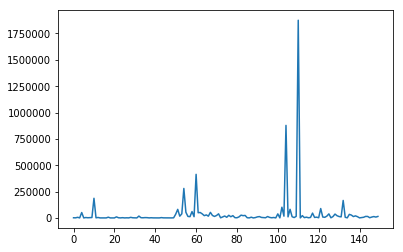

In [162]:
# plot the prediction error 
plt.plot(arraycost_fobos)

In [163]:
arraytheta_fobos[-1] #less weights for x^2 and 1 

array([-118.7810251 ,   20.41818246,  148.76113506])

In [164]:
arraytheta_fobos[49]

array([58.71128279,  0.        ,  0.        ])

In [165]:
arraytheta_fobos[99]

array([141.70232779,  37.1816478 , 135.77182673])

## rda

In [184]:
theta_rda = np.zeros(pop_X.shape[1])

In [185]:
# store starting theta & cost
arraytheta_rda = np.array([theta_rda])
arraycost_rda = np.array([])

In [186]:
## parameters(current hypterparameters values are specified randomly)
gamma = 0.1
lamda = 0.1

In [187]:
def L1_rda(g_bar, lamda, gamma):
    w_new = np.zeros(len(g_bar))
    m = abs(g_bar) > lamda
    w_new[m] = -lamda**0.5 / gamma * (g_bar[m]-lamda*np.sign(g_bar[m]))
    
    return w_new

In [188]:
g_accumulated = 0

for i in range(0, len(pop_X)):
    # calculate cost for theta on CURRENT point
    cost = fcost(theta_rda, pop_X[i], pop_Y[i])
    arraycost_rda = np.append(arraycost_rda, cost)
    
    # update theta with gradient descent
    grad = gradient(theta_rda, pop_X[i], pop_Y[i])
    g_accumulated += grad
    g_bar = g_accumulated / (i+1)
    
    theta_rda = L1_rda(g_bar, lamda, gamma)
    
    arraytheta_rda = np.vstack([arraytheta_rda, theta_rda])

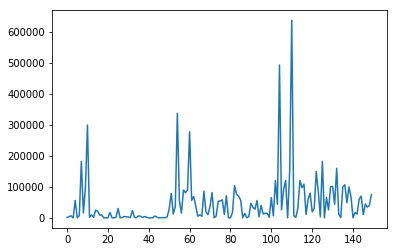

In [189]:
# plot the prediction error 
plt.plot(arraycost_rda)

In [190]:
arraytheta_rda[-1]

array([-19.11528162,  36.4738241 ,  79.48849096])

In [191]:
arraytheta_rda[49]

array([42.50323427, -2.262991  ,  9.5260672 ])

In [192]:
arraytheta_rda[99]

array([77.71848811, 41.67536701, 69.52402565])